##### _Data Visualization with Python_
---

# Heatmap

A heatmap is a graphical representation of data where values in a matrix are represented as colors. It provides an immediate visual summary of information, allowing you to quickly identify patterns, clusters, and outliers within the data.

### Suitable Variable Types
Heatmaps can be used with a variety of data types, but the interpretation depends on the type:
* **Numerical (Interval or Ratio):** Most commonly, heatmaps visualize a matrix of numerical values. The color intensity directly corresponds to the magnitude of the value.
* **Categorical (Ordinal):** If you have ordinal data, you can assign a numerical scale to the categories and then use a heatmap. However, be mindful of the interpretation, as the color differences will represent the *order*, not necessarily equal intervals.
*  **Categorical (Nominal):**  Heatmaps *can* be used with nominal data, but you need to be very careful.  You're essentially visualizing the *frequency* of co-occurrence of categories (like in a contingency table). The color represents count or proportion, *not* an inherent value of the categories themselves.

### Use Cases
1. **Visualizing Correlation Matrices:** This is a *classic* use case. A correlation matrix shows the correlation coefficients between all pairs of variables in a dataset. A heatmap of a correlation matrix makes it easy to quickly identify which variables are strongly positively correlated (darker shades of one color), strongly negatively correlated (darker shades of another color), and weakly correlated (lighter shades or a neutral color).
2. **Visualizing Contingency Tables (Cross-Tabulations):** A contingency table shows the frequency distribution of two or more categorical variables. A heatmap can visualize the counts or proportions in each cell of the table, highlighting cells with high or low frequencies.
3. **Visualizing Data Matrices in General:** Any matrix of numerical data can be visualized as a heatmap. This is common in many fields, including:
    * **Genomics:** Gene expression data.
    * **Image Processing:** Pixel intensity values.
    * **Web Analytics:** User activity on a website (e.g., click-through rates on different elements).
4. **Identifying Clusters and Patterns:** Heatmaps can reveal clusters of similar rows or columns in the data.  This is often used in conjunction with hierarchical clustering, where the rows and columns are reordered to group similar items together.
5. **Finding Highs and Lows:** Quickly identify the maximum and minimum values, or regions of high and low values, within the dataset.
6. **Visualizing Missing Values:** You can set a specific color.

### Potential Pitfalls
1. **Color Scale Choice:** The choice of color scale (colormap) is *crucial*.
    * **Sequential:** Use a sequential colormap (e.g., light to dark shades of a single hue) for data that progresses from low to high.
    * **Diverging:** Use a diverging colormap (e.g., with a neutral color in the middle and contrasting colors at the extremes) for data that has a meaningful midpoint (e.g., positive and negative correlations).
    * **Qualitative:** Use a qualitative colormap (distinct colors) for categorical data, but be mindful of the number of categories.
    * **Perceptually Uniform:** Aim for colormaps that are *perceptually uniform*, meaning that equal changes in the data value correspond to equal perceived changes in color.  Some common colormaps (e.g., the "jet" colormap) are *not* perceptually uniform and can be misleading.
2.  **Data Normalization:**  If the variables in your matrix have very different ranges, you may need to *normalize* the data before creating the heatmap.  Common normalization methods include:
    * **Z-score normalization:**  Standardize each variable to have a mean of 0 and a standard deviation of 1.
    * **Min-max scaling:** Scale each variable to a range between 0 and 1.
    * The choice of normalization depends on the specific data and the goals of the visualization.
3. **Ordering of Rows and Columns:** The order of rows and columns can significantly impact the appearance and interpretability of the heatmap.  Consider using hierarchical clustering to reorder rows and columns based on similarity, which can reveal underlying structure in the data.
4. **Over-Interpretation:** It's easy to see patterns in heatmaps that are not statistically significant.  Be cautious about drawing strong conclusions without further analysis.
5. **Size Limitations:** It is not suitable for very large data sets.

### How to Create Heatmaps?

#### Creating a Dummy Database:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Synthetic Data: Correlated Variables ---
np.random.seed(42)
n = 100  # Number of observations

# Create variables with different correlations
x1 = np.random.rand(n)
x2 = 0.8 * x1 + np.random.randn(n) * 0.2  # Strong positive correlation with x1
x3 = -0.6 * x1 + np.random.randn(n) * 0.3 # Moderate negative correlation with x1
x4 = np.random.randn(n)  # Uncorrelated with x1

df_corr = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4})

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

print(corr_matrix) # Print is used since we have to use df.head()
corr_matrix.head()

          x1        x2        x3        x4
x1  1.000000  0.759292 -0.474812  0.044479
x2  0.759292  1.000000 -0.373327  0.074811
x3 -0.474812 -0.373327  1.000000 -0.107682
x4  0.044479  0.074811 -0.107682  1.000000


,x1,x2,x3,x4
x1,1.000000,0.759292,-0.474812,0.044479
x2,0.759292,1.000000,-0.373327,0.074811
x3,-0.474812,-0.373327,1.000000,-0.107682
x4,0.044479,0.074811,-0.107682,1.000000


#### Heatmaps with Matplotlib:

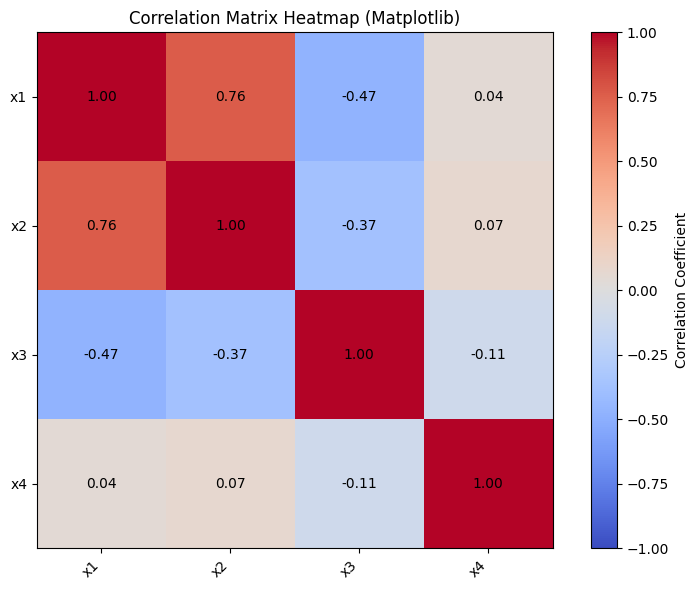

In [2]:
# --- Matplotlib ---
plt.figure(figsize=(8, 6))

plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)  # Use imshow for heatmaps

# Add colorbar
plt.colorbar(label='Correlation Coefficient')

# Add annotations (the correlation values)
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                 ha='center', va='center', color='black')

# Set tick labels
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.title('Correlation Matrix Heatmap (Matplotlib)')
plt.tight_layout()
plt.show()

#### Heatmaps with Seaborn:

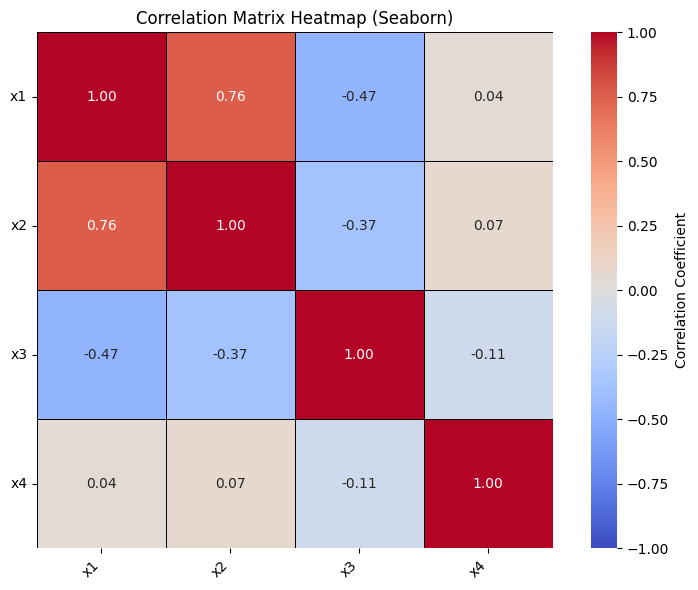

In [3]:
# --- Seaborn ---
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlation Coefficient'},
            linewidths=.5, linecolor='black', # Added borders
            square = True)  # Added square shape

plt.title('Correlation Matrix Heatmap (Seaborn)')
plt.xticks(rotation=45, ha='right') # Added rotation
plt.yticks(rotation=0) # Added rotation
plt.tight_layout()
plt.show()